<a class="anchor" id="0"></a>
# **Classificação de vinhos usando classificador de Árvore de Decisão com Python**

Olá,

Aqui construo uma classificação de qualidade de vinhos usando um classificador de Árvore de Decisão para prever a qualidade satisfatoria ou não de vinhos. 
Eu construo dois modelos, um com o critério índice de Gini e outro com o critério 'entropia'. Implemento a Classificação de Árvore de Decisão com Python e Scikit-Learn.

<a class="anchor" id="0.1"></a>
# **Índice**

1. [Introdução ao algoritmo de Árvore de Decisão](#1)
2. [Árvores de Classificação e Regressão](#2)
3. [Terminologia do algoritmo de Árvore de Decisão](#3)
4. [Intuição do algoritmo de Árvore de Decisão](#4)
5. [Medidas de seleção de atributos](#5)
    - 5.1 [Ganho de informação](#5.1)
    - 5.2 [Índice de Gini](#5.2)
6. [Overfitting no algoritmo de Árvore de Decisão](#6)
7. [Importar bibliotecas](#7)
8. [Importar conjunto de dados](#8)
9. [Análise exploratória de dados](#9)
10. [Declarar vetor de características e variável alvo](#10)
11. [Dividir dados em conjunto de treinamento e teste](#11)
12. [Engenharia de características](#12)
13. [Classificador de Árvore de Decisão com critério índice de Gini](#13)
14. [Classificador de Árvore de Decisão com critério entropia](#14)
15. [Matriz de confusão](#15)
16. [Relatório de classificação](#16)
17. [Resultados e conclusão](#17)
18. [Referências](#18)

# **1. Introdução ao algoritmo de Árvore de Decisão** <a class="anchor" id="1"></a>

[Índice](#0.1)

Um algoritmo de Árvore de Decisão é um dos algoritmos de aprendizado de máquina mais populares. Ele utiliza uma estrutura em forma de árvore e suas possíveis combinações para resolver um determinado problema. Ele pertence à classe de algoritmos de aprendizado supervisionado, podendo ser usado tanto para propósitos de classificação quanto de regressão.

Uma árvore de decisão é uma estrutura que inclui um nó raiz, ramos e nós folha. Cada nó interno denota um teste em um atributo, cada ramo denota o resultado de um teste, e cada nó folha contém um rótulo de classe. O nó mais alto na árvore é o nó raiz.

Fazemos algumas suposições ao implementar o algoritmo de Árvore de Decisão. Estas estão listadas abaixo:

1. No início, todo o conjunto de treinamento é considerado como a raiz.
2. Os valores das características precisam ser categóricos. Se os valores forem contínuos, eles são discretizados antes de construir o modelo.
3. Os registros são distribuídos recursivamente com base nos valores dos atributos.
4. A ordem para colocar atributos como raiz ou nó interno da árvore é feita usando alguma abordagem estatística.

Vou descrever a terminologia da Árvore de Decisão na seção seguinte.


# **2. Árvores de Classificação e Regressão (CART)** <a class="anchor" id="2"></a>

[Índice](#0.1)

Hoje em dia, o algoritmo de Árvore de Decisão é conhecido por seu nome moderno **CART**, que significa **Árvores de Classificação e Regressão**. Árvores de Classificação e Regressão ou **CART** é um termo introduzido por Leo Breiman para se referir a algoritmos de Árvore de Decisão que podem ser usados para problemas de modelagem de classificação e regressão.

O algoritmo CART fornece uma base para outros algoritmos importantes, como árvores de decisão bagged, random forest e árvores de decisão boosteadas. Neste kernel, resolvo um problema de classificação. Portanto, também me referirei ao algoritmo como problema de Classificação de Árvore de Decisão.

# **3. Terminologia do algoritmo de Árvore de Decisão** <a class="anchor" id="3"></a>

[Índice](#0.1)

- Em um algoritmo de Árvore de Decisão, há uma estrutura em forma de árvore em que cada nó interno representa um teste em um atributo, cada ramo representa o resultado do teste e cada nó folha representa um rótulo de classe. Os caminhos do nó raiz ao nó folha representam regras de classificação.

- Podemos ver que há alguma terminologia envolvida no algoritmo de Árvore de Decisão. Os termos envolvidos no algoritmo de Árvore de Decisão são os seguintes:

## **Nó Raiz**

- Representa toda a população ou amostra. Isso é dividido em dois ou mais conjuntos homogêneos.

## **Divisão**

- É um processo de dividir um nó em dois ou mais sub-nós.

## **Nó de Decisão**

- Quando um sub-nó se divide em outros sub-nós, ele é chamado de nó de decisão.

## **Nó Folha/Terminal**

- Nós que não se dividem são chamados de nós Folha ou Terminais.

## **Poda**

- Quando removemos sub-nós de um nó de decisão, esse processo é chamado de poda. É o processo oposto à divisão.

## **Ramo/Sub-Árvore**

- Uma subseção de toda a árvore é chamada de ramo ou sub-árvore.

## **Nó Pai e Nó Filho**

- Um nó, que é dividido em sub-nós, é chamado de nó pai dos sub-nós, onde os sub-nós são os filhos de um nó pai.

A terminologia acima está claramente representada no diagrama a seguir:

### Decision-Tree terminology

![Decision-Tree terminology](https://i1.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo_insights-Tutorial_arvore_de_decisao_02.jpg?resize=640%2C371&ssl=1)


# **4. Intuição do algoritmo de Árvore de Decisão** <a class="anchor" id="4"></a>

[Índice](#0.1)

O algoritmo de Árvore de Decisão é um dos algoritmos de aprendizado supervisionado mais frequentemente e amplamente utilizados, podendo ser aplicado tanto em tarefas de classificação quanto de regressão. A intuição por trás do algoritmo de Árvore de Decisão é muito simples de entender.

A intuição do algoritmo de Árvore de Decisão é a seguinte:

1. Para cada atributo no conjunto de dados, o algoritmo de Árvore de Decisão forma um nó. O atributo mais importante é colocado no nó raiz.

2. Para avaliar a tarefa em questão, começamos no nó raiz e descemos pela árvore seguindo o nó correspondente que atende à nossa condição ou decisão.

3. Esse processo continua até que um nó folha seja alcançado. Ele contém a previsão ou o resultado da Árvore de Decisão.

# **5. Medidas de seleção de atributos** <a class="anchor" id="5"></a>

[Índice](#0.1)

O principal desafio na implementação da Árvore de Decisão é identificar os atributos que consideramos como o nó raiz e em cada nível. Esse processo é conhecido como **seleção de atributos**. Existem diferentes medidas de seleção de atributos para identificar o atributo que pode ser considerado como o nó raiz em cada nível.

Existem 2 medidas populares de seleção de atributos. São elas:

- **Ganho de informação**
- **Índice de Gini**

Ao usar **Ganho de informação** como critério, assumimos que os atributos são categóricos e, para **Índice de Gini**, os atributos são assumidos como contínuos. Essas medidas de seleção de atributos são descritas abaixo.


## **5.1 Ganho de informação** <a class="anchor" id="5.1"></a>

[Índice](#0.1)

Ao usar o ganho de informação como critério, tentamos estimar a informação contida em cada atributo. Para entender o conceito de Ganho de Informação, precisamos conhecer outro conceito chamado **Entropia**.

## **Entropia**

A entropia mede a impureza no conjunto de dados fornecido. Em Física e Matemática, a entropia é referida como a aleatoriedade ou incerteza de uma variável aleatória X. Na teoria da informação, refere-se à impureza em um grupo de exemplos. **Ganho de informação** é a diminuição da entropia. O ganho de informação calcula a diferença entre a entropia antes da divisão e a entropia média após a divisão do conjunto de dados com base nos valores dos atributos fornecidos.

A entropia é representada pela seguinte fórmula:-


![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Aqui, **c** é o número de classes e **pi** é a probabilidade associada à i-ésima classe.

O algoritmo de Árvore de Decisão ID3 (Iterative Dichotomiser) usa entropia para calcular o ganho de informação. Então, ao calcular a diminuição na **medida de entropia** de cada atributo, podemos calcular seu ganho de informação. O atributo com o maior ganho de informação é escolhido como o atributo de divisão no nó.

## **5.2 Índice de Gini** <a class="anchor" id="5.2"></a>

[Índice](#0.1)

Outra medida de seleção de atributos que o **CART (Classificação e Regressão de Árvores)** usa é o **Índice de Gini**. Ele utiliza o método de Gini para criar pontos de divisão.

O Índice de Gini pode ser representado pelo seguinte diagrama:-

## **Indice de Gini**

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


Aqui, novamente **c** é o número de classes e **pi** é a probabilidade associada à i-ésima classe.

O Índice de Gini afirma que, se selecionarmos dois itens aleatoriamente de uma população, eles devem ser da mesma classe e a probabilidade disso é 1 se a população for pura.

Ele funciona com a variável alvo categórica “Sucesso” ou “Falha”. Ele realiza apenas divisões binárias. Quanto maior o valor do Gini, maior a homogeneidade. O CART (Classificação e Regressão de Árvores) usa o método de Gini para criar divisões binárias.

Passos para calcular o Gini para uma divisão:

1. Calcular o Gini para sub-nós, usando a fórmula da soma do quadrado da probabilidade de sucesso e falha (p^2 + q^2).

2. Calcular o Gini para a divisão usando o escore de Gini ponderado de cada nó dessa divisão.

No caso de um atributo de valor discreto, o subconjunto que fornece o índice de Gini mínimo para aquele escolhido é selecionado como atributo de divisão. No caso de atributos de valor contínuo, a estratégia é selecionar cada par de valores adjacentes como um possível ponto de divisão, e o ponto com o menor índice de Gini é escolhido como o ponto de divisão. O atributo com o índice de Gini mínimo é escolhido como o atributo de divisão.

# **6. Overfitting no algoritmo de Árvore de Decisão** <a class="anchor" id="6"></a>

[Índice](#0.1)

Overfitting é um problema prático ao construir um modelo de Árvore de Decisão. O problema de overfitting é considerado quando o algoritmo continua se aprofundando para reduzir o erro do conjunto de treinamento, mas resulta em um aumento do erro do conjunto de teste. Assim, a precisão da previsão para nosso modelo diminui. Isso geralmente acontece quando construímos muitos ramos devido a outliers e irregularidades nos dados.

Duas abordagens que podem ser usadas para evitar o overfitting são as seguintes:

- Pré-Poda

- Pós-Poda

## **Pré-Poda**

Na pré-poda, paramos a construção da árvore um pouco mais cedo. Preferimos não dividir um nó se sua medida de qualidade estiver abaixo de um valor de limiar. Mas é difícil escolher um ponto de parada apropriado.

## **Pós-Poda**

Na pós-poda, vamos cada vez mais fundo na árvore para construir uma árvore completa. Se a árvore mostrar o problema de overfitting, a poda é feita como um passo de pós-poda. Usamos os dados de validação cruzada para verificar o efeito da nossa poda. Usando os dados de validação cruzada, testamos se expandir um nó resultará em melhora ou não. Se mostrar uma melhoria, então podemos continuar expandindo aquele nó. Mas se mostrar uma redução na precisão, então não deve ser expandido. Assim, o nó deve ser convertido em um nó folha.

# **7. Importando bibliotecas** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/winequalitykaggle/winequality-red.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

# **8. Importando base de dados** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [3]:
data = '/kaggle/input/winequalitykaggle/winequality-red.csv'

df = pd.read_csv(data, header=None)

# **9. Analise exploratoria dos dados** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


Agora será explorada a base de dados para obter insghts.

In [4]:
# view dimensions of dataset

df.shape

(1600, 12)

É descrito acima que temos 1600 observações (linhas) e 12 variaveis (colunas) neste banco de dados.

### Visualizar as 5 primeiras linhas da base de dados

In [5]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6


### Renomear colunas

A primeira linha do dataframe estava listando os nomes das colunas ao invez de uma obsevação, vamos ajutar como esta abaixo:-

In [6]:
import pandas as pd

# Defina os novos nomes das colunas
novos_nomes = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
               "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", 
               "pH", "sulphates", "alcohol", "quality"]

# Atribua os novos nomes às colunas
df.columns = novos_nomes

# Verifique as alterações
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1            7.4               0.7          0.0             1.9      0.076   
2            7.8              0.88          0.0             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968   3.2       0.68   
3                 15.0                  54.0    0.997  3.26       0.65   
4                 17.0                  60.0    0.998  3.16       0.58   

   alcohol  quality  
0  alcohol  quality  
1      9.4        5  
2      9.8        5 

In [7]:
# Remova a primeira linha agora que ela foi usada como cabeçalho
df = df[1:]

# Redefina o índice, se necessário
df.reset_index(drop=True, inplace=True)

# Verifique as alterações
print(df.head())

  fixed acidity volatile acidity citric acid residual sugar chlorides  \
0           7.4              0.7         0.0            1.9     0.076   
1           7.8             0.88         0.0            2.6     0.098   
2           7.8             0.76        0.04            2.3     0.092   
3          11.2             0.28        0.56            1.9     0.075   
4           7.4              0.7         0.0            1.9     0.076   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
0                11.0                 34.0  0.9978  3.51      0.56     9.4   
1                25.0                 67.0  0.9968   3.2      0.68     9.8   
2                15.0                 54.0   0.997  3.26      0.65     9.8   
3                17.0                 60.0   0.998  3.16      0.58     9.8   
4                11.0                 34.0  0.9978  3.51      0.56     9.4   

  quality  
0       5  
1       5  
2       5  
3       6  
4       5  


Os nomes das colunas foram atualizados e a primeira linha foi excluida por conter os nomes das colunas ao invez de dados.

### Visualizar o sumario do banco de dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null object
volatile acidity        1599 non-null object
citric acid             1599 non-null object
residual sugar          1599 non-null object
chlorides               1599 non-null object
free sulfur dioxide     1599 non-null object
total sulfur dioxide    1599 non-null object
density                 1599 non-null object
pH                      1599 non-null object
sulphates               1599 non-null object
alcohol                 1599 non-null object
quality                 1599 non-null object
dtypes: object(12)
memory usage: 150.0+ KB


### Ajuste dos tipos de dados das variaveis

Agora, irei ajustar as variveis para valores decimais (float) para melhor descrever as observações.

In [9]:
import pandas as pd

# Suponha que df seja o seu dataframe
# Lista das colunas a serem convertidas para float
colunas_float = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                  'pH', 'sulphates', 'alcohol']

# Converta essas colunas para float
df[colunas_float] = df[colunas_float].astype(float)

# Converta a coluna 'quality' para int
df['quality'] = df['quality'].astype(int)

# Verifique os tipos de dados
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [10]:
# Obtenha a distribuição estatística da variável 'quality'
estatisticas = df['quality'].describe()

print(estatisticas)

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


### Criação de variavel categorica apartir da variavel quality

Agora, irei criar uma classificação binaria para indicar quais vinhos são considerados de nivel de satisfação "Alta" e "baixa"

In [195]:
# Defina os intervalos e as etiquetas para a variável 'nivel_satisfação'
bins = [1, 6, 7.5, np.inf]  # Intervalos para categorização
labels = ['baixa','razoável','alta']  # Etiquetas para cada intervalo

# Crie a nova variável 'nivel_satisfação' com base na variável 'quality'
df['nivel_satisfação'] = pd.cut(df['quality'], bins=bins, labels=labels, right=False)

# Verifique as alterações
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,nivel_satisfação
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,baixa
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,baixa
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,baixa
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,razoável
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,baixa


### Distribuição da nova variavel "nivel_satisfação"

In [194]:
col_names = ['nivel_satisfação']


for col in col_names:
    
    print(df[col].value_counts())   


baixa       744
razoável    638
alta        217
Name: nivel_satisfação, dtype: int64


### Lista de variaveis


- Existem 13 varaiveis no banco de dados. 11 varaiveis são de números decimais, uma de numeros inteiros e uma variavel com duas categorias.


- os nomes das variaveis são: 	fixed acidity	volatile acidity	citric acid	residual sugar	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	quality	nivel_satisfação

- A variável "nível_satisfação é o alvo do estudo.

### Valores "nulos"

In [196]:
# check missing values in variables

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
nivel_satisfação        0
dtype: int64

A avaliação acima indica que não há dados "nulos" nas observações listadas.

# **10. Declarar vetor de características e variável alvo** <a class="anchor" id="10"></a>

[Índice](#0.1)

In [197]:
X = df.drop(['nivel_satisfação','quality'], axis=1)

y = df['nivel_satisfação']

Nas variaveis independentes (preditoras) incluimos todas as variaveis exceto a variavel de interesse "nivel_satisfação" e a variavel "quality", pois a variavel "quality" foi a que determinou as categorias da variavel de interesse, assim usa-la seria redundante.

# **11. Dividir os dados em conjunto de treinamento e conjunto de teste** <a class="anchor" id="11"></a>

[Índice](#0.1)

In [198]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [199]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1071, 11), (528, 11))

# **12. Engenharia de Recursos** <a class="anchor" id="12"></a>

[Índice](#0.1)

**Engenharia de Recursos** é o processo de transformar dados brutos em características úteis que nos ajudam a entender melhor nosso modelo e aumentar seu poder preditivo.

Primeiro, irei verificar os tipos de dados das variáveis novamente.

In [200]:
# check data types in X_train

X_train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

Vemos que além da variavel de interesse, que está contida em "y", não temos outras variaveis categoricas contidas em "X".

Caso houvesse, teriamos que encadear estas variaveis, para que fossem utilizadas como númericas pelo modelo de arvore de decisão abaixo.

Agora temos o conjunto de treinamento e o conjunto de teste prontos para a construção do modelo.

# **13. Classificador de Árvore de Decisão com critério índice de Gini** <a class="anchor" id="13"></a>

[Índice](#0.1)

In [201]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight



In [276]:
# Ajustar pesos das classes, dando mais peso à classe "alta"
class_weights = {'alta': 15, 'baixa': 1, 'razoável': 1}

# Instantiate the model with class weights
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight=class_weights)

# Fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={'alta': 15, 'baixa': 1, 'razoável': 1},
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best')

### Prever os resultados do conjunto de teste com critério índice de Gini

In [277]:
y_pred_gini = clf_gini.predict(X_test)


### Verificar a pontuação de precisão com critério índice de Gini

In [278]:
from sklearn.metrics import accuracy_score

print('Pontuação de precisão do modelo com critério índice de Gini: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Pontuação de precisão do modelo com critério índice de Gini: 0.6610


Aqui, **y_test** são os rótulos de classe verdadeiros e **y_pred_gini** são os rótulos de classe previstos no conjunto de teste.

### Comparar a precisão do conjunto de treinamento e do conjunto de teste

Agora, irei comparar a precisão do conjunto de treinamento e do conjunto de teste para verificar o overfitting.

In [279]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['baixa', 'razoável', 'baixa', ..., 'baixa', 'razoável', 'razoável'],
      dtype=object)

In [280]:
print('Pontuação de precisão do conjunto de treinamento: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Pontuação de precisão do conjunto de treinamento: 0.6937


### Check for overfitting and underfitting

In [281]:
# print the scores on training and test set

print('Pontuação do conjunto de treinamento: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Pontuação do conjunto de teste: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Pontuação do conjunto de treinamento: 0.6937
Pontuação do conjunto de teste: 0.6610


Aqui, a pontuação de precisão do conjunto de treinamento não está tão distante da pontuação na base de teste.

Esses dois valores são bastante comparáveis. Portanto, não há sinais de overfitting.

Contudo, após varios teste no critério "max_depth", não foi possivel subir alem do apresentado acima a capacidade de predição sem criar um "overfiting" na base de treino.


### Visualizar arvode re decisão

[Text(334.8, 380.52, 'X[10] <= 10.525\ngini = 0.607\nsamples = 1071\nvalue = [165, 506, 554]'),
 Text(167.4, 271.8, 'X[1] <= 0.335\ngini = 0.502\nsamples = 665\nvalue = [30, 427, 236]'),
 Text(83.7, 163.07999999999998, 'X[5] <= 6.5\ngini = 0.64\nsamples = 51\nvalue = [30, 16, 33]'),
 Text(41.85, 54.360000000000014, 'gini = 0.465\nsamples = 15\nvalue = [30, 5, 8]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.424\nsamples = 36\nvalue = [0, 11, 25]'),
 Text(251.10000000000002, 163.07999999999998, 'X[9] <= 0.575\ngini = 0.443\nsamples = 614\nvalue = [0, 411, 203]'),
 Text(209.25, 54.360000000000014, 'gini = 0.312\nsamples = 264\nvalue = [0, 213, 51]'),
 Text(292.95, 54.360000000000014, 'gini = 0.491\nsamples = 350\nvalue = [0, 198, 152]'),
 Text(502.20000000000005, 271.8, 'X[10] <= 12.55\ngini = 0.556\nsamples = 406\nvalue = [135, 79, 318]'),
 Text(418.5, 163.07999999999998, 'X[9] <= 0.705\ngini = 0.49\nsamples = 355\nvalue = [60, 73, 278]'),
 Text(376.65000000000003, 54.36000

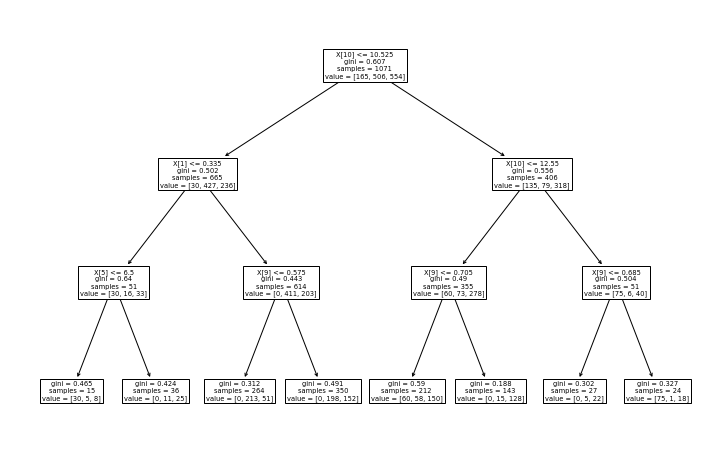

In [282]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

### Visualize decision-trees with graphviz

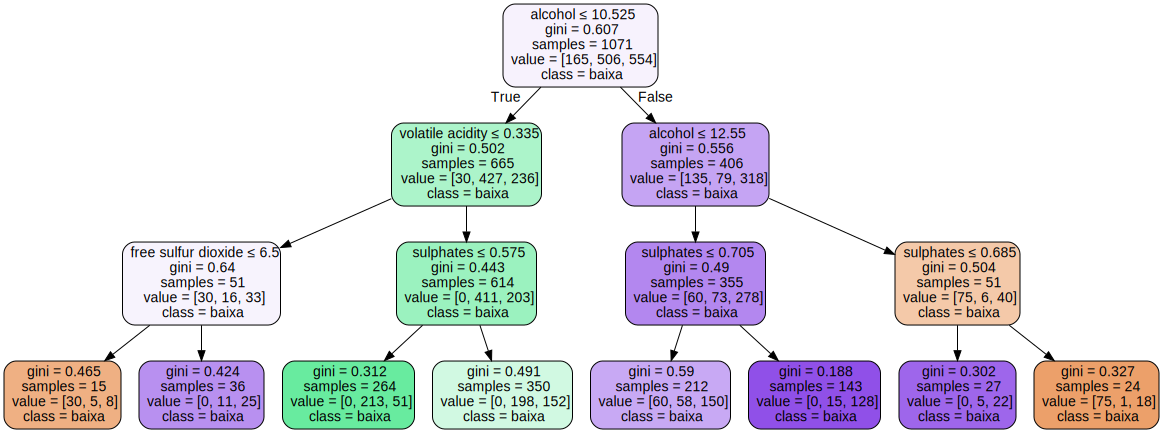

In [283]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

A arvore ilustrada acima mostra que o modelo conseguiu captar caracteristicas de somente uma das três variaveis possíveis.

# **14. Classificador de Árvore de Decisão com critério entropia** <a class="anchor" id="14"></a>

[Índice](#0.1)

In [284]:
# Ajustar pesos das classes, dando mais peso à classe "alta"
class_weights = {'alta': 15, 'baixa': 1, 'razoável': 1}

# Instantiate the model with class weights
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight=class_weights)

# Fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={'alta': 15, 'baixa': 1, 'razoável': 1},
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best')

### Prever os resultados do conjunto de teste com critério entropia

In [285]:
y_pred_en = clf_en.predict(X_test)

### Verificar a pontuação de precisão com critério entropia

In [286]:
from sklearn.metrics import accuracy_score

print('Pontuação de precisão do modelo com critério entropia: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Pontuação de precisão do modelo com critério entropia: 0.6610


### Comparar a precisão do conjunto de treinamento e do conjunto de teste

Agora, irei comparar a precisão do conjunto de treinamento e do conjunto de teste para verificar o overfitting.

In [287]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['baixa', 'razoável', 'baixa', ..., 'baixa', 'razoável', 'razoável'],
      dtype=object)

In [264]:
print('Pontuação de precisão do conjunto de treinamento: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Pontuação de precisão do conjunto de treinamento: 0.7395


### Verificar overfitting e underfitting

In [288]:
# print the scores on training and test set

print('Pontuação do conjunto de treinamento: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Pontuação do conjunto de teste: {:.4f}'.format(clf_en.score(X_test, y_test)))

Pontuação do conjunto de treinamento: 0.6937
Pontuação do conjunto de teste: 0.6610


Podemos ver que a pontuação do conjunto de treinamento e do conjunto de teste é a mesma de antes. A pontuação de precisão do conjunto de treinamento entregaram valores são bastante comparáveis. Portanto, não há sinais de overfitting.
Uma maior capacidade de predição é desejavel, mas aumentar o aprendizado na base de treino está gerando predições menos generalizaveis.


### Visualizar arvore de decisão

[Text(334.8, 380.52, 'X[10] <= 10.525\ngini = 0.607\nsamples = 1071\nvalue = [165, 506, 554]'),
 Text(167.4, 271.8, 'X[1] <= 0.335\ngini = 0.502\nsamples = 665\nvalue = [30, 427, 236]'),
 Text(83.7, 163.07999999999998, 'X[5] <= 6.5\ngini = 0.64\nsamples = 51\nvalue = [30, 16, 33]'),
 Text(41.85, 54.360000000000014, 'gini = 0.465\nsamples = 15\nvalue = [30, 5, 8]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.424\nsamples = 36\nvalue = [0, 11, 25]'),
 Text(251.10000000000002, 163.07999999999998, 'X[9] <= 0.575\ngini = 0.443\nsamples = 614\nvalue = [0, 411, 203]'),
 Text(209.25, 54.360000000000014, 'gini = 0.312\nsamples = 264\nvalue = [0, 213, 51]'),
 Text(292.95, 54.360000000000014, 'gini = 0.491\nsamples = 350\nvalue = [0, 198, 152]'),
 Text(502.20000000000005, 271.8, 'X[10] <= 12.55\ngini = 0.556\nsamples = 406\nvalue = [135, 79, 318]'),
 Text(418.5, 163.07999999999998, 'X[9] <= 0.705\ngini = 0.49\nsamples = 355\nvalue = [60, 73, 278]'),
 Text(376.65000000000003, 54.36000

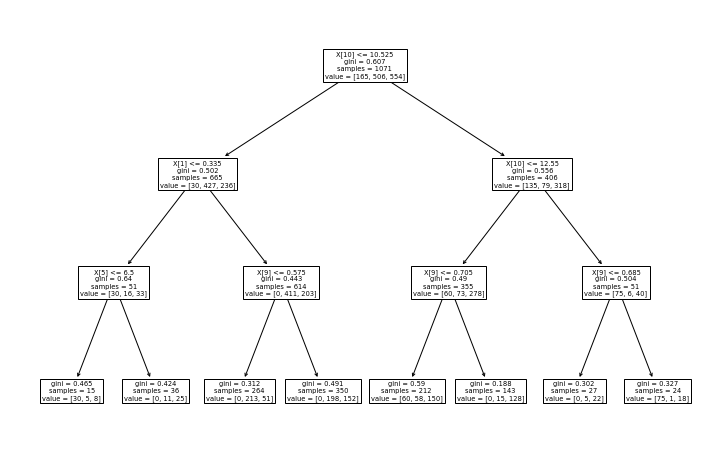

In [289]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

### Visualizar arvore de decisão com graphviz

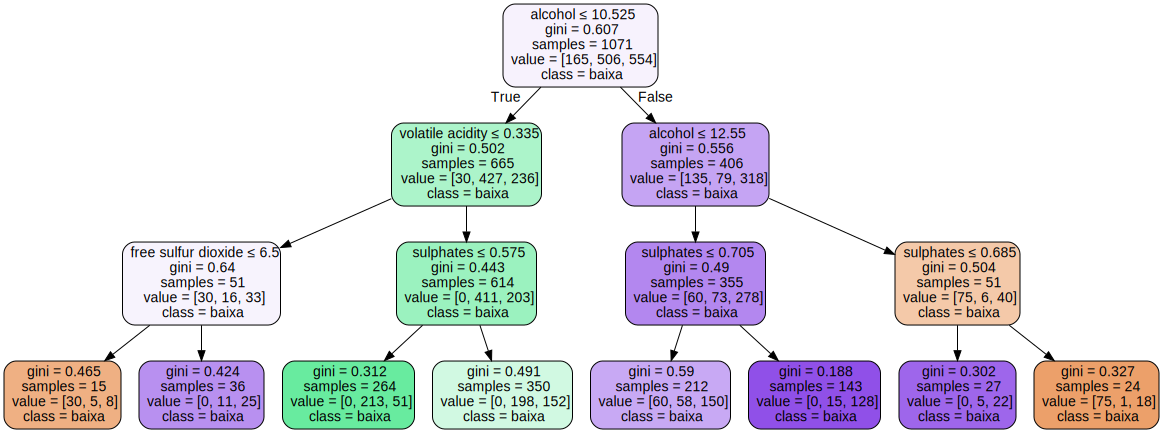

In [290]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Agora, com base na análise acima, podemos concluir que a precisão do nosso modelo de classificação é baixa até o momento. 

As classes criadas não tiveram suas caracteristicas capturdas pelo modelo.

Para verificar a capacidade de predição temos outra ferramenta chamada `Matriz de Confusão` que será avaliada abaixo.

# **15. Matriz de Confusão** <a class="anchor" id="15"></a>

[Índice](#0.1)

Uma matriz de confusão é uma ferramenta para resumir o desempenho de um algoritmo de classificação. Ela nos dará uma visão clara do desempenho do modelo de classificação e dos tipos de erros produzidos pelo modelo. A matriz de confusão fornece um resumo das previsões corretas e incorretas, detalhado por cada categoria. O resumo é apresentado em forma de tabela.

Quatro tipos de resultados são possíveis ao avaliar o desempenho de um modelo de classificação. Esses quatro resultados são descritos abaixo:

**Verdadeiros Positivos (TP)** – Verdadeiros Positivos ocorrem quando prevemos que uma observação pertence a uma certa classe e a observação realmente pertence a essa classe.

**Verdadeiros Negativos (TN)** – Verdadeiros Negativos ocorrem quando prevemos que uma observação não pertence a uma certa classe e a observação realmente não pertence a essa classe.

**Falsos Positivos (FP)** – Falsos Positivos ocorrem quando prevemos que uma observação pertence a uma certa classe, mas a observação realmente não pertence a essa classe. Esse tipo de erro é chamado de **Erro Tipo I**.

**Falsos Negativos (FN)** – Falsos Negativos ocorrem quando prevemos que uma observação não pertence a uma certa classe, mas a observação realmente pertence a essa classe. Esse é um erro muito sério e é chamado de **Erro Tipo II**.

Esses quatro resultados são resumidos em uma matriz de confusão apresentada abaixo.


In [291]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[  3   0   4]
 [  3 181  54]
 [ 15 103 165]]


# **16. Relatório de Classificação** <a class="anchor" id="16"></a>

[Índice](#0.1)

**Relatório de Classificação** é outra maneira de avaliar o desempenho do modelo de classificação. Ele exibe as pontuações de **precisão**, **recall**, **f1** e **suporte** para o modelo. Eu descrevi esses termos mais adiante.

Podemos imprimir um relatório de classificação da seguinte forma:-

In [293]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

        alta       0.14      0.43      0.21         7
       baixa       0.64      0.76      0.69       238
    razoável       0.74      0.58      0.65       283

    accuracy                           0.66       528
   macro avg       0.51      0.59      0.52       528
weighted avg       0.69      0.66      0.66       528



# **17. Resultados e Conclusão** <a class="anchor" id="17"></a>

[Índice](#0.1)

1. Neste projeto, construí um modelo de Classificador de Árvore de Decisão para a classificação de "nivel_satisfaçã" de um vinho. Construi dois modelos, um com o critério `índice de Gini` e outro com o critério `entropia`. O modelo apresenta um desempenho razoalve para as classes "baixa" e "razoavel", conforme indicado pela precisão do modelo em ambos os casos, que foi de 0,67.

2. No modelo com o critério `índice de Gini`, a pontuação de precisão do conjunto de treinamento é 0,72, enquanto a precisão do conjunto de teste é 0,67. Esses dois valores são bastante comparáveis. Portanto, não há sinais de overfitting.

3. Da mesma forma, no modelo com o critério `entropia`, a pontuação de precisão do conjunto de treinamento é 0,72, enquanto a precisão do conjunto de teste é 0,67. Obtemos os mesmos valores que no caso com o critério `índice de Gini`. Portanto, não há sinais de overfitting.

4. Em ambos os casos, a pontuação de precisão do conjunto de treinamento e do conjunto de teste é a mesma. Isso pode ocorrer devido ao pequeno tamanho do conjunto de dados.

5. A matriz de confusão e o relatório de classificação mostram um desempenho razoavel do modelo para duas das três classes.

6. Desempenho Ruim na Classe "Alta": O modelo acertou somente 16% ao tentar identificar ou prever corretamente a classe "alta". Isso pode ser devido ao pequeno número de amostras dessa classe (apenas 7), o que pode ter levado a um desbalanceamento significativo. O balanceamento desta classificação foi configurado, mesmo assim não houve melhora nesta predição.

7. Desempenho Razoável nas Classes "Baixa" e "Razoável": O modelo teve um desempenho moderado nas classes "baixa" e "razoável", mas com recall ligeiramente melhor na classe "razoável".

8. Implicações do Desbalanceamento: A falha em prever a classe "alta" sugere que o desbalanceamento no conjunto de dados teve um impacto significativo, o modelo priorizou a classe "alta"nas predições, mas ainda assim as predições não foram precisas.

9. Obter mais dados de vinhos tintos de qualidade 8 ou maior ajustará e irá balancer as classes do modelo, assim a capacidade de predição aumentará na classe "alta" em si, e em geral.

# **18. Referências** <a class="anchor" id="18"></a>

[Índice](#0.1)

O trabalho realizado neste projeto é inspirado nos seguintes livros e sites:-

1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3. https://en.wikipedia.org/wiki/Decision_tree

4. https://en.wikipedia.org/wiki/Information_gain_in_decision_trees

5. https://en.wikipedia.org/wiki/Entropy_(information_theory)

6. https://www.datacamp.com/community/tutorials/decision-tree-classification-python

7. https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

8. https://acadgild.com/blog/decision-tree-python-code


Então, chegamos ao fim da analise.

Agradeço aos comentários e sujestões que surgirem.

[Voltar ao topo](#0)